In [ ]:
from google.colab import files
files.upload()
!ls

Saving iris.data to iris.data
Saving iristest.data to iristest.data
iris.data  iristest.data  sample_data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
train_dataset = pd.read_csv('iris.data').replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,1,2])
print(f'Rows: {len(train_dataset)}')
print(f'Columns: {len(train_dataset.columns)}')
train_dataset.head()

test_dataset = pd.read_csv('iristest.data').replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,1,2])
print(f'Rows: {len(test_dataset)}')
print(f'Columns: {len(test_dataset.columns)}')
test_dataset.head()

Rows: 120
Columns: 5
Rows: 30
Columns: 5


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.0,3.5,1.3,0.3,0
1,4.5,2.3,1.3,0.3,0
2,4.4,3.2,1.3,0.2,0
3,5.0,3.5,1.6,0.6,0
4,5.1,3.8,1.9,0.4,0


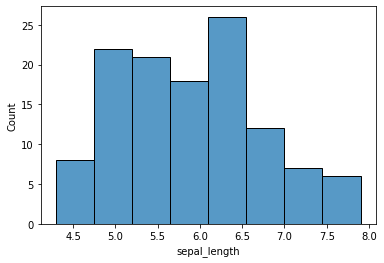

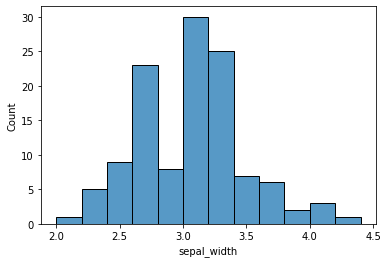

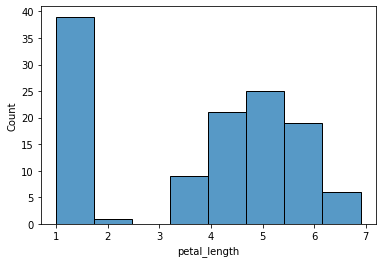

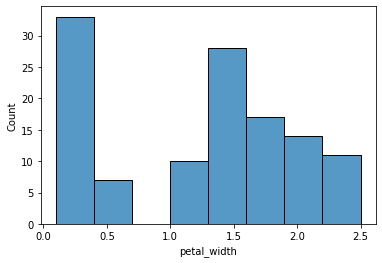

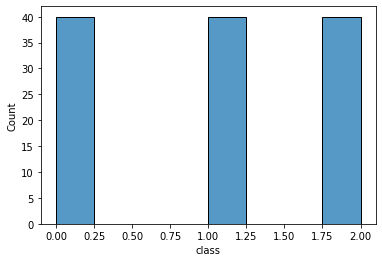

In [ ]:
for stat in train_dataset.columns:
    sns.histplot(train_dataset[stat])
    plt.show()

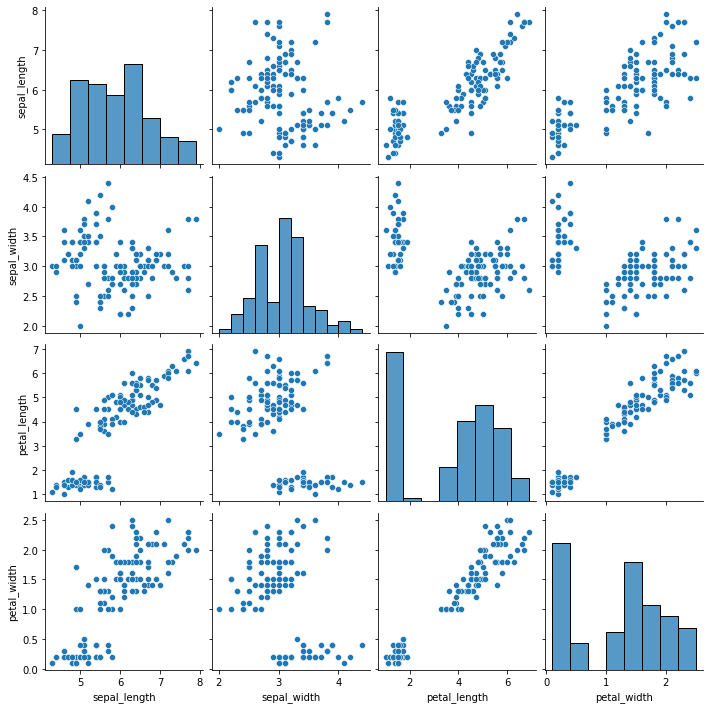

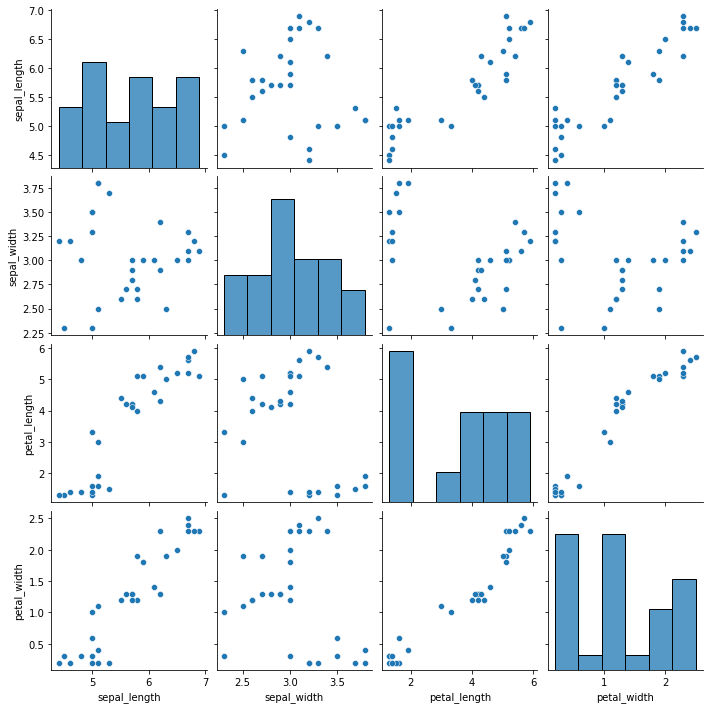

In [ ]:
sns.pairplot(train_dataset.drop(columns = ['class'], axis = 1))

In [ ]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(1,3)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                #print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])


    return new_centers

In [ ]:
# Gets data and k, returns a list of center points.
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    #print('data[0]:',data[0])
    centers = random_centers(dims,k)

    clustered_data = point_clustering(data, centers, dims, first_cluster=True)
    #print(clustered_data)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)

    return centers

def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])

    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None

    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)

    return nearest_center

In [ ]:
def plot_clusters(clusters, centers, k, a = 1):
    plotx = []; centerx = []
    ploty = []; centery = []
    for i in range(len(clusters)):
        plotx.append(clusters[i][0])
        ploty.append(clusters[i][1])
    for i in range(len(centers)):
        centerx.append(centers[i][0])
        centery.append(centers[i][1])
    plt.plot(plotx[:k], ploty[:k], 'bo', plotx[k:2*k], ploty[k:2*k], 'ro', plotx[2*k:3*k], ploty[2*k:3*k], 'go', alpha = a)
    plt.plot(centerx, centery, 'ko')

[[0.2, 1.4], [0.2, 1.4], [0.2, 1.3], [0.2, 1.5], [0.2, 1.4], [0.4, 1.7], [0.3, 1.4], [0.2, 1.5], [0.2, 1.4], [0.1, 1.5], [0.2, 1.5], [0.2, 1.6], [0.1, 1.4], [0.1, 1.1], [0.2, 1.2], [0.4, 1.5], [0.4, 1.3], [0.3, 1.4], [0.3, 1.7], [0.3, 1.5], [0.2, 1.7], [0.4, 1.5], [0.2, 1.0], [0.5, 1.7], [0.2, 1.9], [0.2, 1.6], [0.4, 1.6], [0.2, 1.5], [0.2, 1.4], [0.2, 1.6], [0.2, 1.6], [0.4, 1.5], [0.1, 1.5], [0.2, 1.4], [0.1, 1.5], [0.2, 1.2], [0.2, 1.3], [0.1, 1.5], [0.2, 1.3], [0.2, 1.5], [1.4, 4.7], [1.5, 4.5], [1.5, 4.9], [1.3, 4.0], [1.5, 4.6], [1.3, 4.5], [1.6, 4.7], [1.0, 3.3], [1.3, 4.6], [1.4, 3.9], [1.0, 3.5], [1.5, 4.2], [1.0, 4.0], [1.4, 4.7], [1.3, 3.6], [1.4, 4.4], [1.5, 4.5], [1.0, 4.1], [1.5, 4.5], [1.1, 3.9], [1.8, 4.8], [1.3, 4.0], [1.5, 4.9], [1.2, 4.7], [1.3, 4.3], [1.4, 4.4], [1.4, 4.8], [1.7, 5.0], [1.5, 4.5], [1.0, 3.5], [1.1, 3.8], [1.0, 3.7], [1.2, 3.9], [1.6, 5.1], [1.5, 4.5], [1.6, 4.5], [1.5, 4.7], [1.3, 4.4], [1.3, 4.1], [1.3, 4.0], [2.5, 6.0], [1.9, 5.1], [2.1, 5.9], [1.

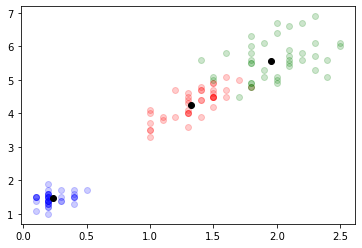

In [ ]:
sw_sl_train = np.array(train_dataset[['sepal_width', 'sepal_length']]).tolist()
pl_sl_train = np.array(train_dataset[['petal_length', 'sepal_length']]).tolist()
pw_sl_train = np.array(train_dataset[['petal_width', 'sepal_length']]).tolist()
pl_sw_train = np.array(train_dataset[['petal_length', 'sepal_width']]).tolist()
pw_sw_train = np.array(train_dataset[['petal_width', 'sepal_width']]).tolist()
pw_pl_train = np.array(train_dataset[['petal_width', 'petal_length']]).tolist()

sw_sl_test = np.array(test_dataset[['sepal_width', 'sepal_length']]).tolist()
pl_sl_test = np.array(test_dataset[['petal_length', 'sepal_length']]).tolist()
pw_sl_test = np.array(test_dataset[['petal_width', 'sepal_length']]).tolist()
pl_sw_test = np.array(test_dataset[['petal_length', 'sepal_width']]).tolist()
pw_sw_test = np.array(test_dataset[['petal_width', 'sepal_width']]).tolist()
pw_pl_test = np.array(test_dataset[['petal_width', 'petal_length']]).tolist()
data = pw_pl_train
print(data)
centers = train_k_means_clustering(data, k=3, epochs=5)
print(centers)
plot_clusters(data, centers, 40, 0.2)
#plot_clusters(pw_sw_test, centers, 10)
sw_sl = np.array(train_dataset[['class']]).tolist()
count = 0
for i in range(120):
    c = predict_k_means_clustering(pw_pl_train[i][:2], centers)
    if c == sw_sl[i][0]:
        count+=1
print(count/120)
count1 = 0
count2 = 0
count3 = 0
for i in range(120):
    if pw_pl_train[i][2] == sw_sl[i][0]:
        count+=1
    if pw_pl_train[i][2] == sw_sl[i][0]:
        count+=1
    if pw_pl_train[i][2] == sw_sl[i][0]:
        count+=1
print(count/120)

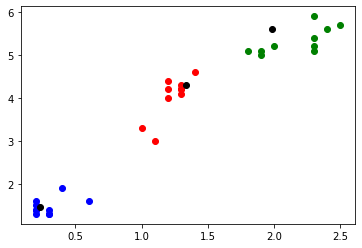

In [ ]:
plot_clusters(pw_pl_test, centers, 10)

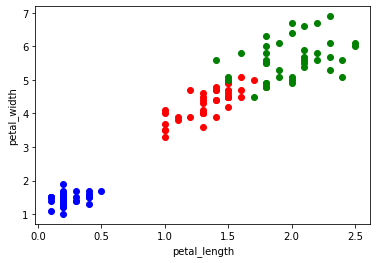

In [ ]:
sw_sl_train = np.array(train_dataset[['sepal_width', 'sepal_length']]).tolist()
pw_pl_train = np.array(train_dataset[['petal_width', 'petal_length']]).tolist()
plotx = []; centerx = []
ploty = []; centery = []
fig, ax = plt.subplots()
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
k = 40
for i in range(len(pw_pl_train)):
    plotx.append(pw_pl_train[i][0])
    ploty.append(pw_pl_train[i][1])
plt.plot(plotx[:k], ploty[:k], 'bo', plotx[k:2*k], ploty[k:2*k], 'ro', plotx[2*k:3*k], ploty[2*k:3*k], 'go')

In [ ]:
count = 0
for i in pw_pl_train:
    c = predict_k_means_clustering(i[:2], centers)
    if c == i[2]:
      count+=1
print(count/120)

center: 0 dist: 0.0625
center: 1 dist: 4.366666666666667
center: 2 dist: 2.9978723404255327
center: 0 dist: 0.0625
center: 1 dist: 4.366666666666667
center: 2 dist: 2.9978723404255327
center: 0 dist: 0.16249999999999987
center: 1 dist: 4.466666666666667
center: 2 dist: 3.097872340425533
center: 0 dist: 0.03750000000000009
center: 1 dist: 4.266666666666667
center: 2 dist: 2.8978723404255327
center: 0 dist: 0.0625
center: 1 dist: 4.366666666666667
center: 2 dist: 2.9978723404255327
center: 0 dist: 0.23750000000000004
center: 1 dist: 4.066666666666666
center: 2 dist: 2.6978723404255325
center: 0 dist: 0.0625
center: 1 dist: 4.366666666666667
center: 2 dist: 2.9978723404255327
center: 0 dist: 0.03750000000000009
center: 1 dist: 4.266666666666667
center: 2 dist: 2.8978723404255327
center: 0 dist: 0.0625
center: 1 dist: 4.366666666666667
center: 2 dist: 2.9978723404255327
center: 0 dist: 0.03750000000000009
center: 1 dist: 4.266666666666667
center: 2 dist: 2.8978723404255327
center: 0 dist: 